In [29]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [4]:
epi_data = pd.read_csv('epi_r.csv')

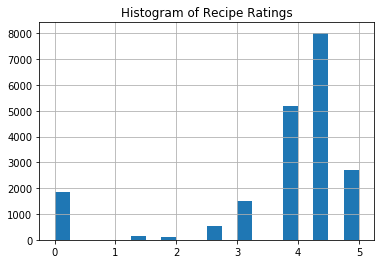

In [7]:
epi_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [9]:
# Count nulls 
null_count = epi_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [11]:
from sklearn.svm import SVR
svr = SVR()
X = epi_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = epi_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
svr.score(X, Y)

0.038565706512988962

In [15]:
cross_val_score(svr, X, Y, cv=5)

array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])

## The challenge begins

In [16]:
epi_data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Turn target variable into classification.  I chose 3 because there was not a 3.5 rating.
epi_data['good'] = epi_data['rating'] >= 3.0

In [27]:
# redefining Y
Y = epi_data['good']

In [30]:
# Using PCA to acquire 30 features
pca = PCA(n_components=30)
pca.fit(X)
X_pca = pca.transform(X)

In [31]:
svc = SVC()
svc.fit(X_pca, Y)
svc.score(X_pca, Y)

0.87507480550568517

In [32]:
cross_val_score(svc, X_pca, Y, cv=5)

array([ 0.8726321 ,  0.87506234,  0.8765586 ,  0.87356608,  0.87506234])

Much Better but lets try one  more thing

## Feature Selection by popularity

In [34]:
# Restarting with the original data to try different features
df2 = epi_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)

# Select only rows where rating is > 3.5
epi_data[epi_data['good'] == True]

# Sort keywords by value count
keywords = df2.sum().sort_values(ascending=False)

# Select top 30 words and store in list
keywords = keywords[:31].index.tolist()

In [39]:
# dropping the added 'good' from list
X_keywords = epi_data[keywords]

# Remove target variable
X_keywords = X_keywords.drop(['good'], 1)

X_keywords.head()

,bon appétit,peanut free,soy free,tree nut free,vegetarian,gourmet,kosher,pescatarian,quick & easy,wheat/gluten-free,...,healthy,kidney friendly,onion,tomato,vegetable,sauté,milk/cream,fruit,vegan,kid-friendly
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
Y = epi_data['good']
# Train and test model
svc = SVC()
svc.fit(X_keywords,Y)
svc.score(X_keywords, Y)

0.86754438460003991

In [42]:
cross_val_score(svc, X_keywords, Y, cv=5)

array([ 0.86739781,  0.86758105,  0.86758105,  0.86758105,  0.86758105])

Both results were pretty close, but the PCA results ended up being around 1% more accurate. There absolutely could be bias towards certain foods, as mentioned in the content people who like chocolate will be more likely to rate higher because their favorite sweets are chocolate based. Any ingredient could do this, I don't care for lima beans and my wife hates cucumbers, so dishes with those items would face harsher ratings from us.